# **Pytorch - 1**
Membuat simple CNN classifier dengan dataset yang telah disediakan Pytorch.

####**1. Load Dataset**
Pertama mengimport library torch dan torchvision.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Kemudian me-load dataset yang digunakan. Kali ini saya menggunakan dataset CIFAR-10.

In [ ]:
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

batch_size = 128

traindata = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=batch_size, shuffle=True, num_workers=4)

testdata = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=4, shuffle=False, num_workers=4)

Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#### **2. Melihat beberapa image yang ada di dataset**

dengan menggunakan library matplotlib.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


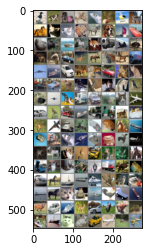

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imgshow(img):
  img = img / 2 + 0.5 ### --> konversi dari -1,1 ke 0,1
  imgn = img.numpy()
  plt.imshow(np.transpose(imgn, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))

#### **3. Mendefinisikan CNN Model**

dengan menggunakan kelas yang diturunkan dari kelas torch.nn.Module.

Mendefinisikan loss function dan optimizer.

In [ ]:
import torch.nn.functional as F
import torch.optim as optim

class CNNModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(3, 6, 5)
    self.pool1 = torch.nn.MaxPool2d(2, 2)
    self.conv2 = torch.nn.Conv2d(6, 16, 5)
    self.pool2 = torch.nn.MaxPool2d(2, 2)
    self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
    self.fc2 = torch.nn.Linear(120, 84)
    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = CNNModel()
net.to("cuda")
print(net)

### mendefinisikan loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

CNNModel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### **4. Training**

Looping per epoch dan update menggunakan optimizer.

In [ ]:
for epoch in range (10):
  ###
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = inputs.to("cuda")
    optimizer.zero_grad()

    outputs = net(inputs)
    outputs = outputs.cpu()
    lossval = loss(outputs, labels)
    lossval.backward()
    optimizer.step()

    running_loss += lossval.item()
  #if (i + 1) % 2000 == 0:
  print("Epoch:", epoch + 1, "Mini batch ke:", i + 1, "Loss:", running_loss/len(traindata))
  running_loss = 0.0
print("Finish ...")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1 Mini batch ke: 391 Loss: 0.015861498107910155
Epoch: 2 Mini batch ke: 391 Loss: 0.012052886838912964
Epoch: 3 Mini batch ke: 391 Loss: 0.010645131659507751
Epoch: 4 Mini batch ke: 391 Loss: 0.009735088195800781
Epoch: 5 Mini batch ke: 391 Loss: 0.00909038300871849
Epoch: 6 Mini batch ke: 391 Loss: 0.008560214771032333
Epoch: 7 Mini batch ke: 391 Loss: 0.008151873474121094
Epoch: 8 Mini batch ke: 391 Loss: 0.007783039960861206
Epoch: 9 Mini batch ke: 391 Loss: 0.0074288709843158725
Epoch: 10 Mini batch ke: 391 Loss: 0.007130875333547592
Finish ...


Saving weights

In [ ]:
torch.save(net.cpu().state_dict(), "./cifar-epoch10.pth")
!ls

cifar-epoch10.pth  data  sample_data


#### **5. Testing Net nya**
Melakukan testing dengan data spesifik.

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


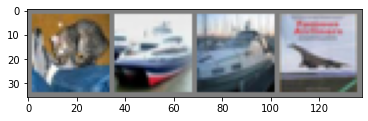

  cat  ship  ship airplane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imgshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % testdata.classes[labels[i]] for i in range(4) ))

In [ ]:
#inputs = inputs.to("cpu")
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)
print(testdata.class_to_idx)
print(traindata.class_to_idx)
print(' '.join('%5s' % testdata.classes[predicted[i]] for i in range(4) ))

tensor([5, 8, 1, 0])
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
  dog  ship automobile airplane


Test untuk semua images di test set

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    total += labels.size(0)

    correct += (predicted == labels).sum().item()
print("Acc:", (correct/float(total))*100)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Acc: 61.91
